**Import of libraries**

In [ ]:

import numpy as np
import string
import keras
import glob, os
import pandas as pd
import csv as csv
from numpy import loadtxt
import tensorflow as tf
from keras import utils as np_utils
#from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Embedding
from keras.layers import Dense, Input
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
drive.mount('/content/drive')
!pwd
print('import done')
print(tf.__version__)

Mounted at /content/drive
/content
import done
2.12.0


**Load data and labels and create 3D inputs**

In [ ]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
Data = []

os.chdir('/content/drive/MyDrive/codes/LSTM_autoencoder/LeapGestureDB_dataset_fixed_TimeSteps/dataTrain')
!pwd
t = preprocessing.MinMaxScaler(feature_range=(0, 1))
#t= MinMaxScaler()
for files in sorted(glob.glob("*.txt"), key=numericalSort):
  f= np.loadtxt(files, unpack = True, delimiter=",")
    # scale data
  t.fit(f)
  f= t.transform(f)
  Data.append(f)
os.chdir('/content/drive/MyDrive/codes/LSTM_autoencoder/LeapGestureDB_dataset_fixed_TimeSteps/dataTest')
!pwd
for files in sorted(glob.glob("*.txt"), key=numericalSort):
    f= np.loadtxt(files, unpack = True, delimiter=",")
    # scale data
    t.fit(f)
    f= t.transform(f)
    Data.append(f)
Data_Autoencoder = np.array(Data)
print('all data shape:',Data_Autoencoder.shape)
print(Data_Autoencoder)
print('ok load data')
Y=[]
Y=pd.read_csv ('/content/drive/MyDrive/codes/LSTM_autoencoder/y_train.csv',delimiter =',',engine="python")
Y2=pd.read_csv ('/content/drive/MyDrive/codes/LSTM_autoencoder/y_test.csv',delimiter =',',engine="python")
Y=Y.append(Y2)
Y_Autoencoder= np.array(Y)
Y_Autoencoder= Y_Autoencoder.reshape(Y_Autoencoder.shape[0],Y_Autoencoder.shape[1],1)
nClass=11
#Y_Autoencoder = keras.utils.np_utils.to_categorical(Y_Autoencoder, nClass)



print(Y_Autoencoder.shape)
print(Y_Autoencoder)
print('ok load labels')


/content/drive/MyDrive/codes/LSTM_autoencoder/LeapGestureDB_dataset_fixed_TimeSteps/dataTrain
/content/drive/MyDrive/codes/LSTM_autoencoder/LeapGestureDB_dataset_fixed_TimeSteps/dataTest
all data shape: (6600, 60, 6)
[[[0.12612093 0.08766734 0.10726722 0.08836157 0.11630242 0.11698364]
  [0.05062022 0.04474268 0.06518663 0.01023739 0.03243148 0.03062228]
  [0.14282606 0.06177681 0.1640043  0.09273599 0.11862013 0.14083783]
  ...
  [0.7246396  0.65489035 0.4965879  0.68662087 0.69908169 0.70872276]
  [0.83607023 0.83091717 0.76268189 0.82765341 0.82909288 0.82811119]
  [1.         1.         1.         1.         1.         1.        ]]

 [[0.15033503 0.12680758 0.20835125 0.09174491 0.09631547 0.13380969]
  [0.0779176  0.0847197  0.17110293 0.00513116 0.00759384 0.04167433]
  [0.03080859 0.04759895 0.15432527 0.         0.         0.02964273]
  ...
  [0.0398166  0.21244006 0.00356983 0.10397672 0.07252204 0.03991039]
  [0.09924139 0.28680033 0.05180558 0.15719335 0.12447893 0.08899422]

**LSTM_Autoencoder Model**

In [ ]:

# define model autoencoder
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=(Data_Autoencoder.shape[1],Data_Autoencoder.shape[2]),return_sequences=True, dropout=0.25, recurrent_dropout=0.25))
model.add(LSTM(units=64, activation='relu', return_sequences=False, dropout=0.25, recurrent_dropout=0.25))
model.add(RepeatVector(Data_Autoencoder.shape[1]))
model.add(LSTM(units=64, activation='relu', return_sequences=True, dropout=0.25, recurrent_dropout=0.25))
model.add(LSTM(units=128, activation='relu', return_sequences=True, dropout=0.25, recurrent_dropout=0.25))
model.add(TimeDistributed(Dense(Data_Autoencoder.shape[2])))
#model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

**Train the autoencoder**

In [ ]:
# fit model
history=model.fit(Data_Autoencoder, Data_Autoencoder, epochs=200, batch_size=60, verbose=1)


In [ ]:
os.chdir('/content/drive/MyDrive/codes/LSTM_autoencoder')
!pwd
model.save("model_Autoencoder_bi_c_entr.h5")

In [ ]:
# demonstrate reconstruction
Data_reconstruct = model.predict(Data_Autoencoder, verbose=1)
print('---Reconstructed---')
print((Data_reconstruct))
os.chdir('/content/drive/MyDrive/codes/LSTM_autoencoder')
!pwd
np.save('Data_reconstruct_bicentr.npy',Data_reconstruct)

207/207 [==============================] - 13s 62ms/step
---Reconstructed---
[[[0.12957285 0.13521442 0.19301642 0.18910718 0.19828089 0.20132986]
  [0.10724656 0.10768922 0.15946358 0.15275821 0.15628001 0.16080585]
  [0.09609833 0.09135938 0.1302474  0.11801443 0.12475914 0.137575  ]
  ...
  [0.3353156  0.29373196 0.22562374 0.25601307 0.23967515 0.291626  ]
  [0.34201178 0.30671072 0.23624511 0.2674711  0.24859773 0.2982283 ]
  [0.34935212 0.32000595 0.24749063 0.27938396 0.25843206 0.30443606]]

 [[0.12240687 0.12605932 0.19621426 0.19291338 0.20385799 0.2090911 ]
  [0.08510566 0.08245644 0.15154926 0.14680266 0.15360594 0.16016224]
  [0.07114349 0.06172454 0.12358765 0.11032211 0.119671   0.13627559]
  ...
  [0.13111606 0.11828482 0.08118811 0.05650541 0.05845737 0.06590649]
  [0.14285761 0.13009289 0.09843279 0.06741685 0.06736842 0.07631072]
  [0.15653193 0.14541939 0.11995012 0.07818866 0.07523522 0.08638417]]

 [[0.15050747 0.15743957 0.2218866  0.21665254 0.2250673  0.2270650

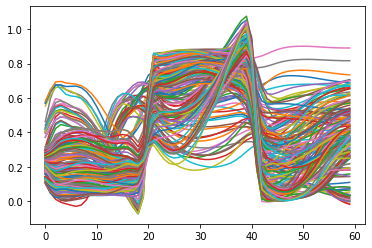

In [ ]:
fig, ax = plt.subplots()
#for i in range (0, Data_reconstruct.shape[0]):
for i in range (0, 30):
  ax.plot(Data_reconstruct[5600-i])
plt.show()

dict_keys(['loss'])


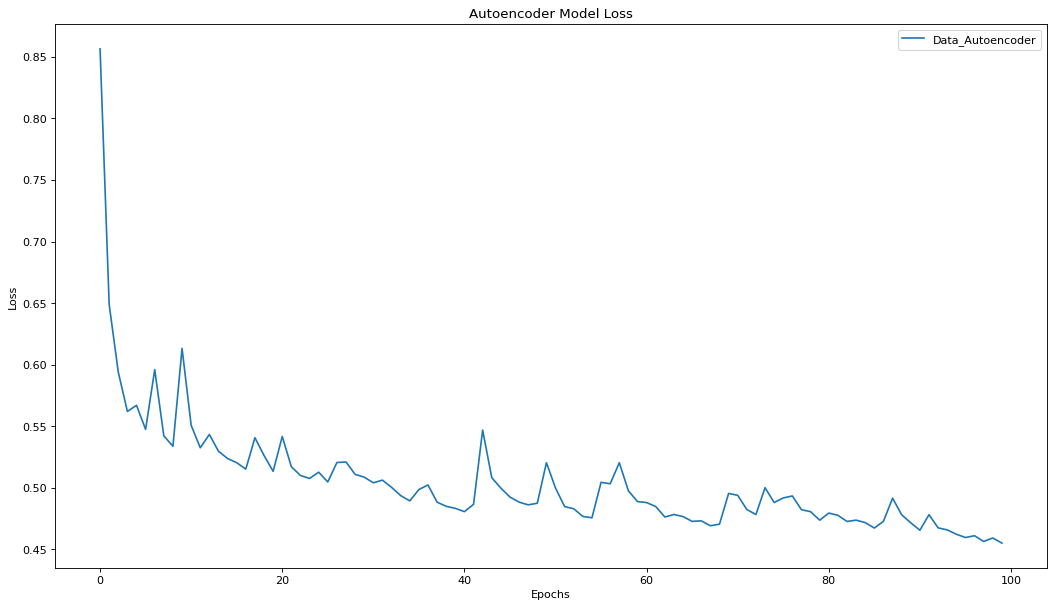

In [ ]:
#plt.plot(model.history.history['loss'])
print(history.history.keys())
plt.figure(figsize=(16,9), dpi=80)
plt.plot(history.history['loss'])
plt.title('Autoencoder Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Data_Autoencoder'])
plt.show()
#plot(history)

In [ ]:
#generated dataset
Generated_data=np.concatenate((Data_Autoencoder,Data_reconstruct), axis=0)
Generated_Labels=np.concatenate((Y_Autoencoder,Y_Autoencoder), axis=0)
os.chdir('/content/drive/MyDrive/codes/LSTM_autoencoder')
!pwd
np.save('Data_generated_bicentr.npy',Generated_data)
np.save('labels_generated.npy',Generated_Labels)

/content/drive/MyDrive/codes/LSTM_autoencoder


In [ ]:
#Load DATA
os.chdir('/content/drive/MyDrive/codes/LSTM_autoencoder')
!pwd
reconstructed_data= np.load('Data_reconstruct_bicentr.npy')
Data_Autoencoder= np.load('Data_Autoencoder_fixed.npy')
Y_Autoencoder= np.load('labels_Autoencoder.npy')
#Data_Generated=np.load('Data_generated.npy')
Labels_Generated=np.load('labels_generated.npy')
#Data_Autoencoder= np.load('Data_Autoencoder_varied.npy')
#Data_reconstruct= np.load('Data_reconstruct_mse.npy')

/content/drive/MyDrive/codes/LSTM_autoencoder


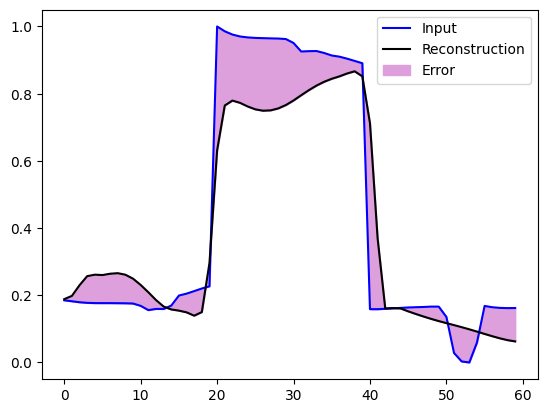

In [ ]:
x=Data_Autoencoder[3000]
x1=reconstructed_data[3000]
plt.plot(x[:,0], 'b')
plt.plot(x1[:,0], 'k')
plt.fill_between(np.arange(60), x[:,0], x1[:,0], color='plum')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


**Train different LSTM architechture with the original dataset, the reconstructed dataset and the augmented dataset**

In [ ]:
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(Data_Generated,Labels_Generated, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(reconstructed_data, Y_Autoencoder, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(Data_Autoencoder, Y_Autoencoder, test_size=0.2, random_state=1)
nSamples=X_train.shape[0]
nFeatures=X_train.shape[2]
TimeSteps=X_train.shape[1]

In [ ]:
# vanilla LSTM model
model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features), return_sequences=True))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Bi-LSTM model
model = Sequential()
	model.add(Bidirectional(LSTM(100, input_shape=(n_timesteps,n_features),return_sequences=True)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Deep-LSTM model
model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features),return_sequences=True)))
  model.add(LSTM(100))
	model.add(Dropout(0.25))
 	model.add(LSTM(100))
	model.add(LSTM(100,return_sequences=False))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# HBU-LSTM model
model = Sequential()
	model.add(Bidirectional(LSTM(100, input_shape=(n_timesteps,n_features),return_sequences=True)))
	model.add(Dropout(0.25))
 	model.add(LSTM(100,return_sequences=False))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model_classification.fit(X_train, y_train, batch_size=100, epochs=200, validation_split=0.05)
plot.plt(history)


**Models evaluation metrics**

In [ ]:
print("calculate loss and accuracy on test data")

test_loss, test_accuracy = model_classification.evaluate(X_test, y_test)
print('Test loss: {:2.2f}%'.format(test_loss*100))
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

In [ ]:
from sklearn.metrics import classification_report
num_classes=11
test_labels=y_test
predicted_classes= Y_Pred
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))


In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(test_labels,predicted_classes)
sns.heatmap(cm,annot=True,cmap='viridis')